In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [96]:
campagne_df = pd.read_csv(r"C:\Users\franc\PROJET GITHUB\Prediction_CampagneMarketing\Dataset_Reponse_Marketing.csv")
campagne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   2400 non-null   int64  
 1   Sexe                  2400 non-null   object 
 2   Revenu_annuel         2400 non-null   int64  
 3   Temps_passe_sur_site  2400 non-null   float64
 4   Achats_en_ligne       2400 non-null   int64  
 5   Reponse_campagne      2400 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 112.6+ KB


In [97]:
print(campagne_df.head(5))

   Age   Sexe  Revenu_annuel  Temps_passe_sur_site  Achats_en_ligne  \
0   22  Homme          40124             16.518974                9   
1   32  Femme          26307             21.973535                8   
2   28  Femme          30040             26.762915                9   
3   16  Femme          15843             29.046008                9   
4   45  Homme          20225             21.479944                5   

   Reponse_campagne  
0                 1  
1                 1  
2                 1  
3                 0  
4                 0  


In [98]:
print(campagne_df.shape)

(2400, 6)


In [99]:
print(campagne_df.isnull().sum())

Age                     0
Sexe                    0
Revenu_annuel           0
Temps_passe_sur_site    0
Achats_en_ligne         0
Reponse_campagne        0
dtype: int64


In [100]:
campagne_df['Reponse_campagne'].value_counts()


Reponse_campagne
1    1263
0    1137
Name: count, dtype: int64

In [101]:
campagne_df.describe()


,Age,Revenu_annuel,Temps_passe_sur_site,Achats_en_ligne,Reponse_campagne
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,34.611250,26197.005000,22.073762,7.642083,0.526250
std,10.087287,7062.015627,3.993837,1.612471,0.499415
min,-1.000000,4422.000000,8.656394,2.000000,0.000000
25%,28.000000,21414.250000,19.381206,7.000000,0.000000
50%,35.000000,26222.000000,22.072839,8.000000,1.000000
75%,42.000000,30909.250000,24.798229,9.000000,1.000000
max,79.000000,50002.000000,37.769324,13.000000,1.000000


In [102]:
campagne_df['Sexe'].describe()


count      2400
unique        2
top       Femme
freq       1238
Name: Sexe, dtype: object

Age


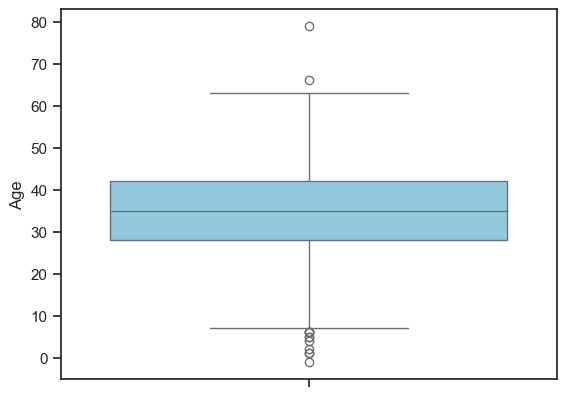

Revenu_annuel


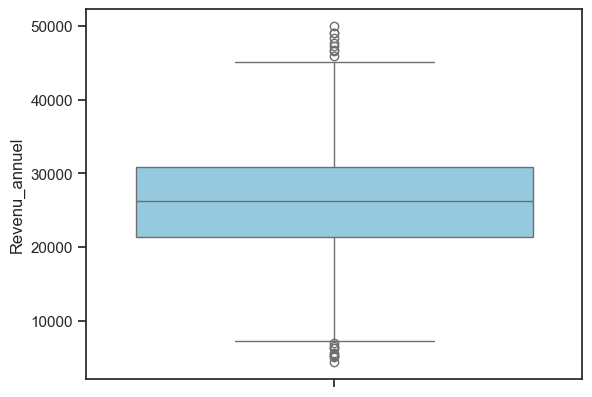

Temps_passe_sur_site


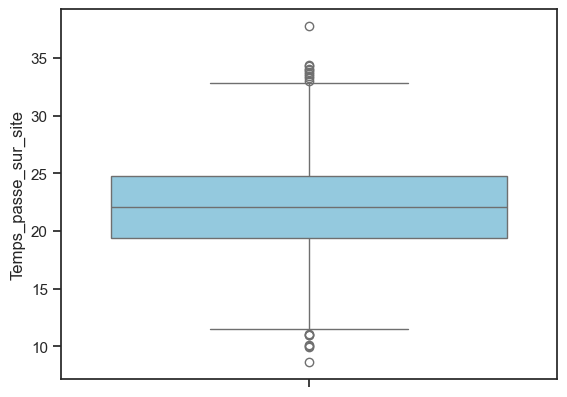

Achats_en_ligne


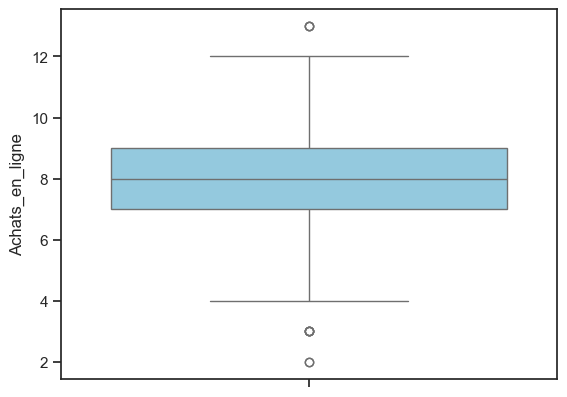

Reponse_campagne


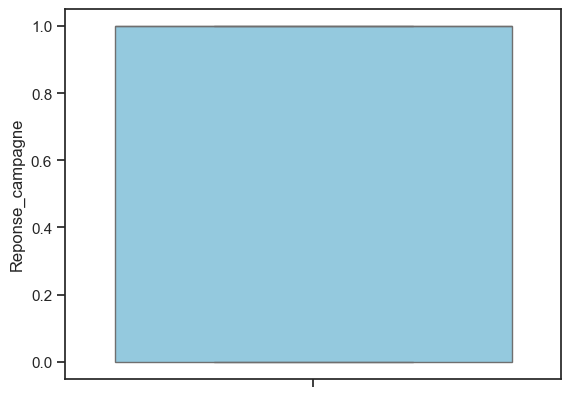

In [103]:
quant_vars = campagne_df.select_dtypes(include=['float64', 'int64'])

# Tracé des boxplots pour chaque variable quantitative avec Seaborn
sns.set(style="ticks")
for var in quant_vars:
    print(var)
    sns.boxplot(y=var, data=quant_vars, color="skyblue")
    plt.show()

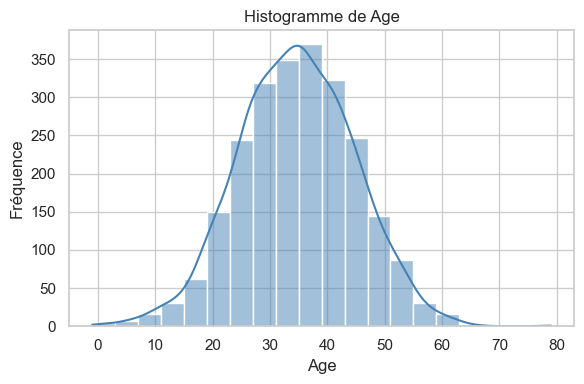

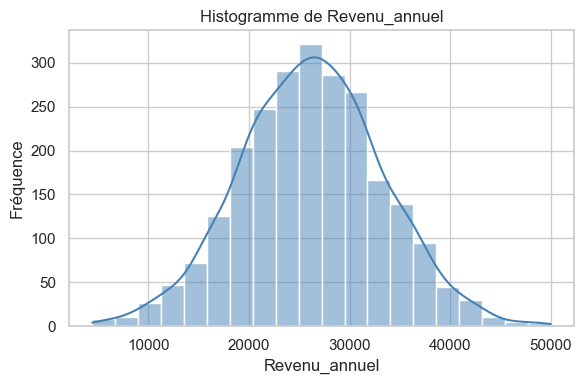

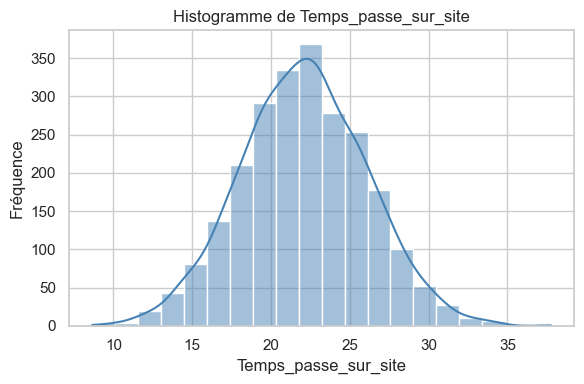

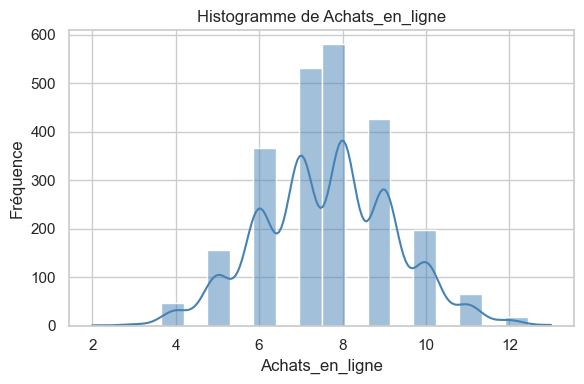

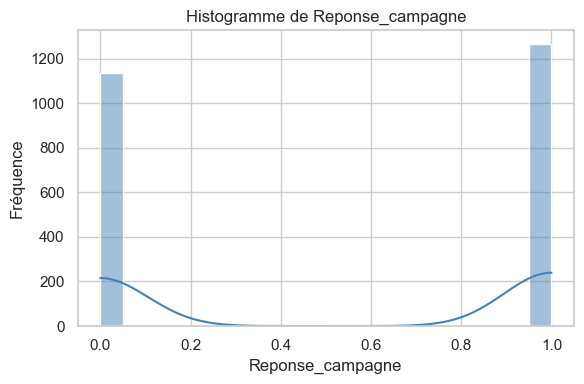

In [104]:
quant_vars = campagne_df.select_dtypes(include=['float64', 'int64'])

sns.set(style="whitegrid")

for var in quant_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(campagne_df[var], bins=20, kde=True, color="steelblue")
    plt.title(f'Histogramme de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show()


In [105]:
for col in campagne_df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = campagne_df[col].quantile(0.25)
    Q3 = campagne_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = campagne_df[(campagne_df[col] < Q1 - 1.5 * IQR) | (campagne_df[col] > Q3 + 1.5 * IQR)]
    print(f"{col} : {len(outliers)} valeurs aberrantes")


Age : 13 valeurs aberrantes
Revenu_annuel : 18 valeurs aberrantes
Temps_passe_sur_site : 17 valeurs aberrantes
Achats_en_ligne : 10 valeurs aberrantes
Reponse_campagne : 0 valeurs aberrantes


In [106]:
# Garde uniquement les lignes où l'âge est supérieur ou égal à 16
campagne_df = campagne_df[campagne_df['Age'] >= 16]

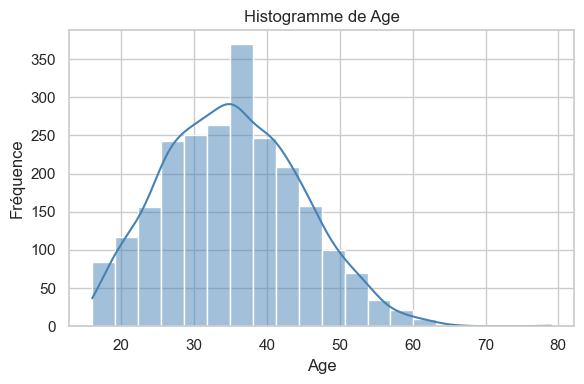

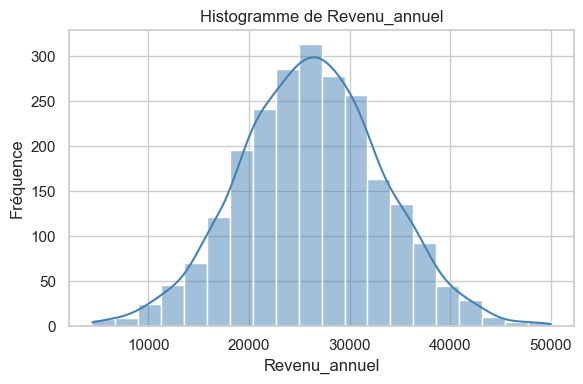

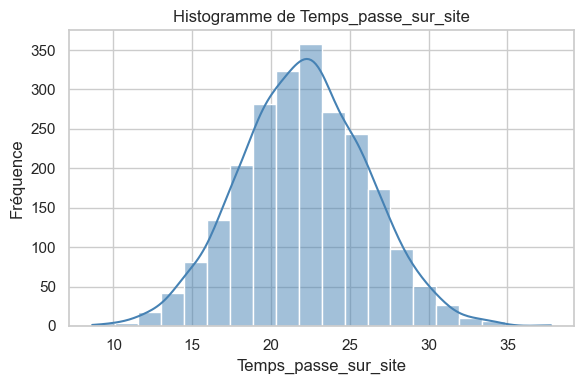

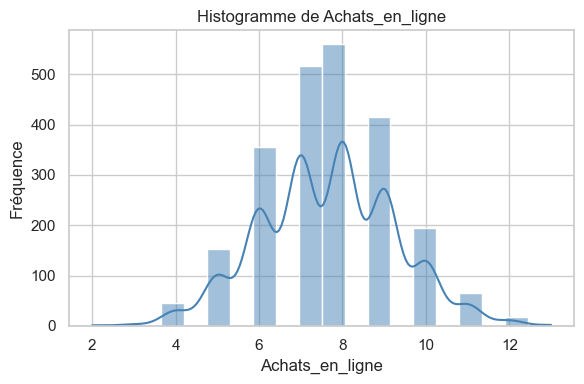

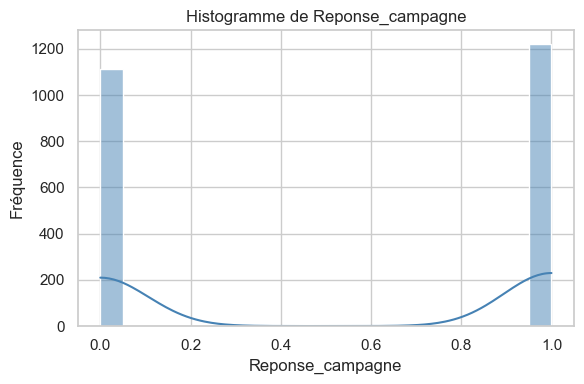

In [107]:
quant_vars = campagne_df.select_dtypes(include=['float64', 'int64'])

sns.set(style="whitegrid")

for var in quant_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(campagne_df[var], bins=20, kde=True, color="steelblue")
    plt.title(f'Histogramme de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')
    plt.tight_layout()
    plt.show()


In [108]:
campagne_df.loc[:, 'Sexe'] = campagne_df['Sexe'].map({'Femme': 1, 'Homme': 0})


In [109]:
print(campagne_df.isnull().sum())

Age                     0
Sexe                    0
Revenu_annuel           0
Temps_passe_sur_site    0
Achats_en_ligne         0
Reponse_campagne        0
dtype: int64


In [110]:
print(campagne_df)

      Age Sexe  Revenu_annuel  Temps_passe_sur_site  Achats_en_ligne  \
0      22    0          40124             16.518974                9   
1      32    1          26307             21.973535                8   
2      28    1          30040             26.762915                9   
3      16    1          15843             29.046008                9   
4      45    0          20225             21.479944                5   
...   ...  ...            ...                   ...              ...   
2395   26    0          34373             31.567494               10   
2396   37    1          36249             26.347662               10   
2397   30    1          34293             18.275369                7   
2398   35    0          29447             17.211780                6   
2399   39    1          28028             32.826752               10   

      Reponse_campagne  
0                    1  
1                    1  
2                    1  
3                    0  
4         

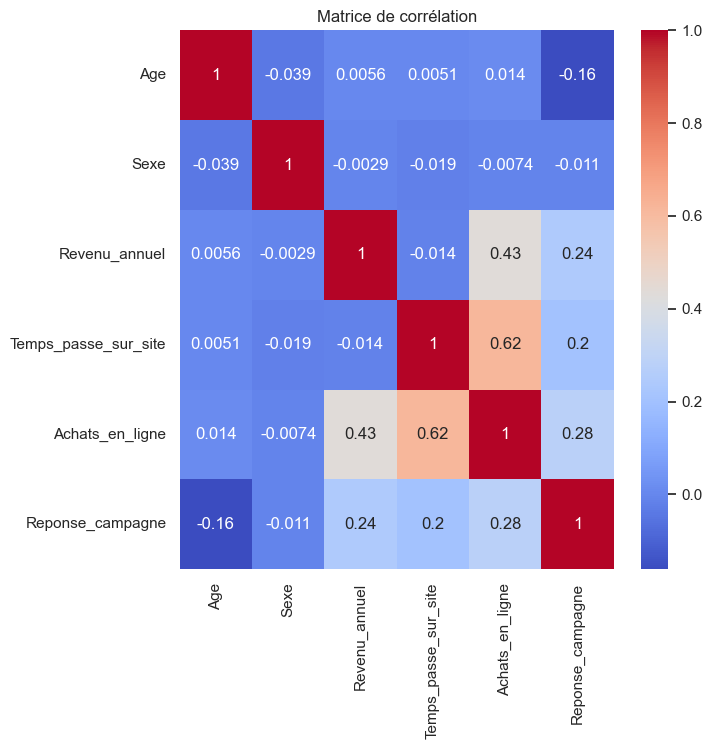

In [111]:

corr_matrix = campagne_df.corr()

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

Relations significatives:

La corrélation la plus forte (0.62) existe entre le temps passé sur le site et les achats en ligne, indiquant logiquement que plus un utilisateur passe de temps sur la plateforme, plus il est susceptible d'effectuer des achats

Une corrélation modérée (0.43) entre le revenu annuel et les achats en ligne suggère que les personnes à revenus plus élevés ont tendance à dépenser davantage

Le temps passé sur le site, les achats en ligne et la réponse aux campagnes forment un groupe de variables interconnectées avec des corrélations positives entre elles (0.20 à 0.28)

Relations faibles:

L'âge présente une corrélation négative faible (-0.16) avec la réponse aux campagnes, suggérant que les personnes plus jeunes pourraient être légèrement plus réceptives aux campagnes marketing

Les variables démographiques (âge et sexe) ont généralement des corrélations très faibles avec les comportements d'achat


Pour améliorer les corrélations entre ces variables, plusieurs approches sont possibles:

Transformation des variables : Appliquer des transformations mathématiques (logarithmique, racine carrée) pour révéler des relations non-linéaires potentielles

Création de variables composites : Combiner certaines variables pour créer de nouveaux indicateurs plus pertinents (par exemple, un score d'engagement combinant temps sur site et fréquence d'achat)

Segmentation de l'analyse : Étudier les corrélations au sein de sous-groupes spécifiques (par tranche d'âge par exemple) pourrait révéler des corrélations plus fortes dans certains segments

Collecte de données supplémentaires : Ajouter des variables qui pourraient avoir des liens plus forts avec les comportements actuels (historique d'achat, préférences déclarées, etc.)

Traitement des valeurs aberrantes : Identifier et gérer les outliers qui pourraient masquer certaines corrélations

In [112]:
Q1 = campagne_df['Temps_passe_sur_site'].quantile(0.25)
Q3 = campagne_df['Temps_passe_sur_site'].quantile(0.75)
IQR = Q3 - Q1

borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR

campagne_df = campagne_df[(campagne_df['Temps_passe_sur_site'] >= borne_inf) & (campagne_df['Temps_passe_sur_site'] <= borne_sup)]


In [113]:
Q1 = campagne_df['Achats_en_ligne'].quantile(0.25)
Q3 = campagne_df['Achats_en_ligne'].quantile(0.75)
IQR = Q3 - Q1

borne_inf = Q1 - 1.5 * IQR
borne_sup = Q3 + 1.5 * IQR
campagne_df = campagne_df[(campagne_df['Achats_en_ligne'] >= borne_inf) & (campagne_df['Achats_en_ligne'] <= borne_sup)]

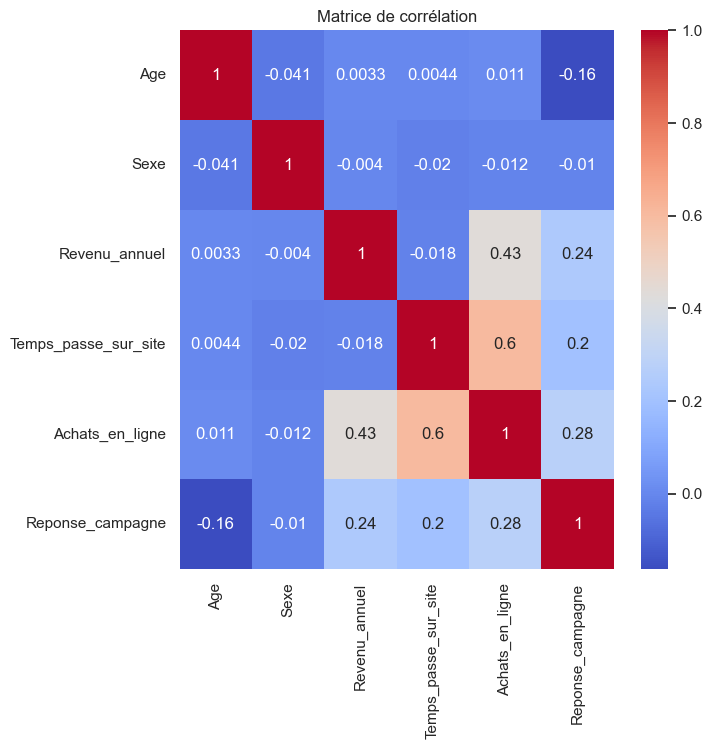

In [114]:

corr_matrix = campagne_df.corr()

# Calcul des p-values pour chaque paire de variables
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

Pas de changement après supression des outliers des deux colonnes les plus correlés. Il faudrais recolter plus de variables discriminates pour avoir plus de liens entre les variables.

In [115]:
problem = campagne_df.drop("Reponse_campagne", axis=1)
solution = campagne_df[["Reponse_campagne"]]

In [84]:
standard_scaler_object = StandardScaler()
campagne_df_scaled = standard_scaler_object.fit_transform(problem)

In [85]:
pca_object = PCA(4)
principal_components = pca_object.fit_transform(campagne_df_scaled)

In [86]:
#Analyse de variance
explained_variance = pca_object.explained_variance_ratio_
cumulative_variance = numpy.cumsum(explained_variance)

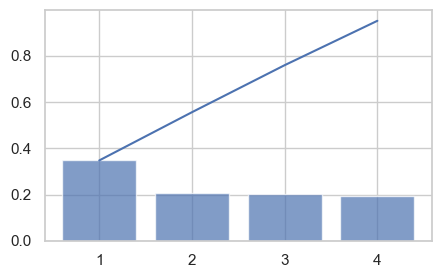

In [87]:
plt.figure(figsize=(5,3))
plt.bar(range(1,len(explained_variance) + 1),explained_variance,alpha=0.7,label='explained_variance')
plt.plot(range(1,len(cumulative_variance) + 1),cumulative_variance, label='cumulative_variance')
plt.show()

In [88]:
compressed_data = principal_components[:, :4]

In [89]:
compressed_data

array([[ 0.59500673,  0.81613551,  2.12658488, -1.96637117],
       [ 0.11268972,  0.92542491, -0.14355349,  0.44280868],
       [ 1.48238043,  1.19708071, -0.52900916,  0.18241998],
       ...,
       [-0.43023372,  1.38487046,  1.23935168,  0.13313417],
       [-1.24961213, -0.49612354,  1.1507582 , -0.88115169],
       [ 2.73770802,  0.18091428, -1.36996085,  1.12918233]],
      shape=(2308, 4))

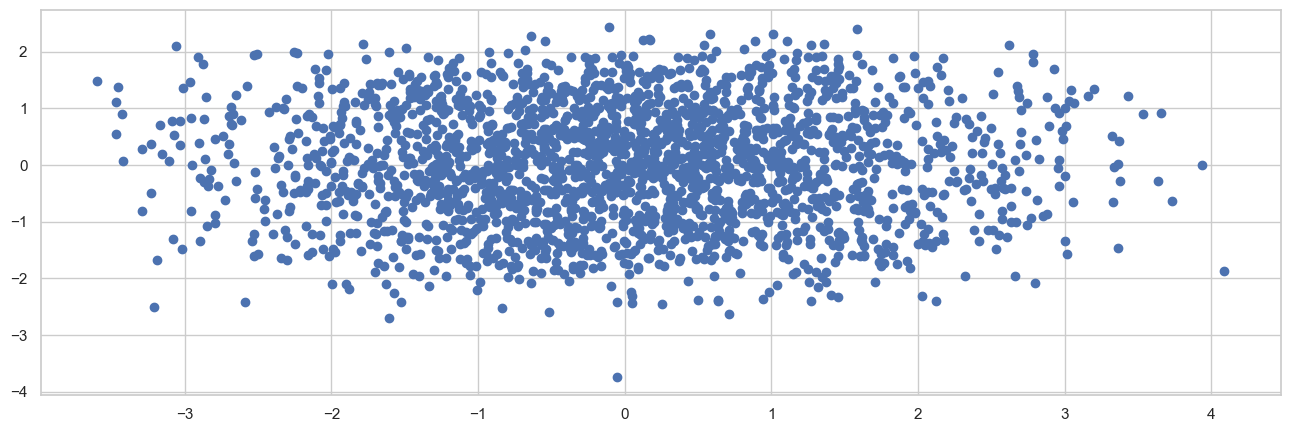

In [90]:
plt.figure(figsize=(16,5))
plt.plot(compressed_data[:,0], compressed_data[:,1], "o")
plt.show()

In [91]:
pd.DataFrame(pca_object.components_, columns=problem.columns, index=[f"PC_{number}" for number in range(2, 6)])

,Age,Sexe,Revenu_annuel,Temps_passe_sur_site,Achats_en_ligne
PC_2,0.017609,-0.030183,0.405575,0.573930,0.710557
PC_3,-0.678836,0.698127,0.195924,-0.112898,0.025837
PC_4,0.232011,-0.086581,0.783785,-0.569513,0.003206
PC_5,0.696427,0.710047,-0.083737,0.060593,0.011757


In [118]:
solution = solution.values.ravel()
# 1. Dictionnaire des modèles
models = {
    "Régression Logistique": LogisticRegression(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(),
    "Arbre de Décision": DecisionTreeClassifier(),
    "SVM": SVC()
}

# 2. Dictionnaire des métriques
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# 3. Initialisation du tableau des résultats
results = []

# 4. Validation croisée pour chaque modèle
for name, model in models.items():
    scores = cross_validate(model, campagne_df_scaled, solution, cv=5, scoring=scoring)
    results.append({
        'Modèle': name,
        'Accuracy': scores['test_accuracy'].mean(),
        'Precision': scores['test_precision'].mean(),
        'Recall': scores['test_recall'].mean(),
        'F1-score': scores['test_f1'].mean()
    })

# 5. Affichage sous forme de DataFrame
results_df = pd.DataFrame(results)
print(results_df)


                  Modèle  Accuracy  Precision    Recall  F1-score
0  Régression Logistique  0.649476   0.657092  0.690138  0.673175
1                    KNN  0.610909   0.622259  0.651181  0.636276
2          Random Forest  0.651217   0.662764  0.679377  0.670692
3      Arbre de Décision  0.600958   0.619526  0.612304  0.615774
4                    SVM  0.660739   0.660670  0.723274  0.690427


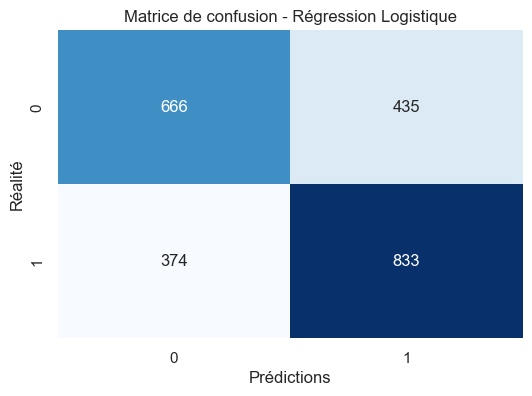

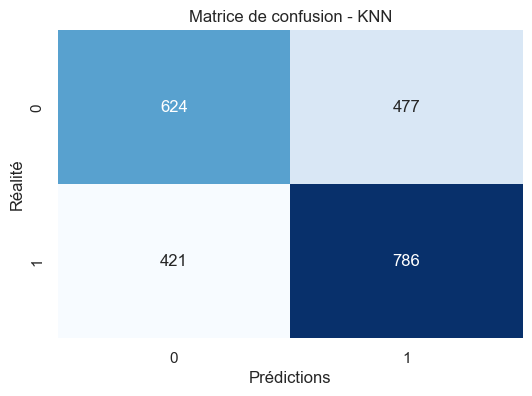

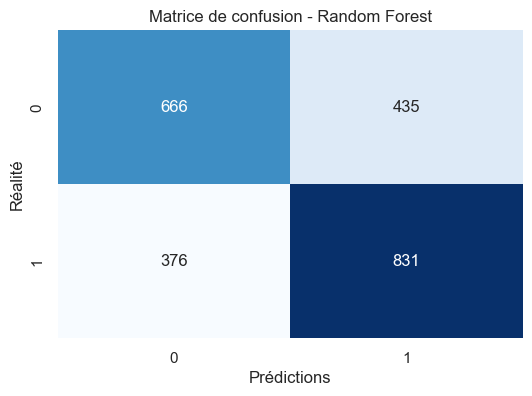

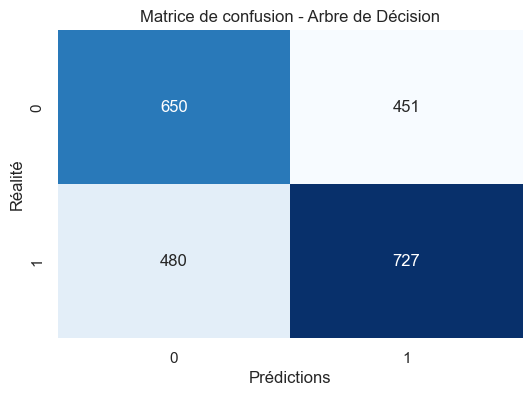

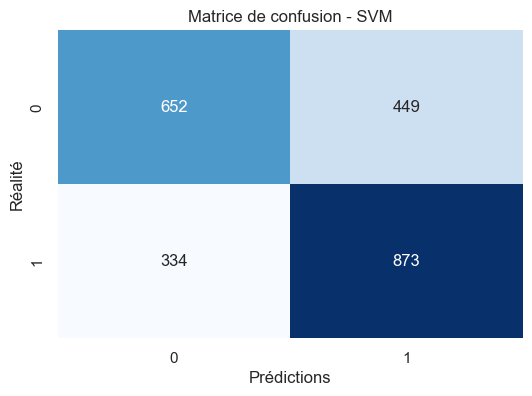

In [122]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix



for name, model in models.items():
    y_pred = cross_val_predict(model, campagne_df_scaled, solution, cv=5)
    cm = confusion_matrix(solution, y_pred)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Matrice de confusion - {name}")
    plt.xlabel('Prédictions')
    plt.ylabel('Réalité')
    plt.show()


In [129]:
X_train, X_test, y_train, y_test = train_test_split(campagne_df_scaled, solution, random_state=42)

In [124]:


def get_optimal_k_value(campagne_df_scaled, solution):
    n_folds = 5
    parameters = {"n_neighbors" : numpy.arange(1, 52, 2)}
    grid_search_object = GridSearchCV(KNeighborsClassifier(),
                                    parameters,
                                     cv=n_folds,
                                     scoring="f1_macro")
    
    grid_search_object.fit(campagne_df_scaled, solution)
    print(grid_search_object.best_params_)
    scores = pd.DataFrame(grid_search_object.cv_results_)
    return scores


In [126]:
scores = get_optimal_k_value(campagne_df_scaled, solution)
scores

{'n_neighbors': np.int64(29)}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001518,0.000373,0.013271,0.005124,1,{'n_neighbors': 1},0.605699,0.587228,0.620997,0.573374,0.563696,0.590199,0.020895,26
1,0.001128,0.000057,0.010062,0.000588,3,{'n_neighbors': 3},0.611752,0.606453,0.629577,0.584235,0.585051,0.603414,0.017136,25
2,0.001314,0.000203,0.010000,0.001123,5,{'n_neighbors': 5},0.622569,0.604162,0.622180,0.604397,0.591173,0.608896,0.012001,24
3,0.001190,0.000146,0.011138,0.000933,7,{'n_neighbors': 7},0.627214,0.620100,0.639720,0.649882,0.604221,0.628227,0.015776,23
4,0.001212,0.000277,0.010926,0.001081,9,{'n_neighbors': 9},0.618494,0.616090,0.648058,0.644899,0.615009,0.628510,0.014749,22
5,0.001311,0.000199,0.011147,0.001136,11,{'n_neighbors': 11},0.622854,0.628406,0.659329,0.646258,0.641651,0.639700,0.012988,21
6,0.001447,0.000485,0.011216,0.000826,13,{'n_neighbors': 13},0.634748,0.624258,0.650492,0.649283,0.643875,0.640531,0.009851,20
7,0.001123,0.000046,0.011431,0.000814,15,{'n_neighbors': 15},0.652837,0.633125,0.636893,0.658051,0.645881,0.645357,0.009366,17
8,0.001462,0.000541,0.011674,0.000633,17,{'n_neighbors': 17},0.639736,0.647866,0.649939,0.647836,0.633157,0.643707,0.006329,18
9,0.001263,0.000288,0.012544,0.001385,19,{'n_neighbors': 19},0.642604,0.645590,0.645977,0.646932,0.632569,0.642734,0.005285,19


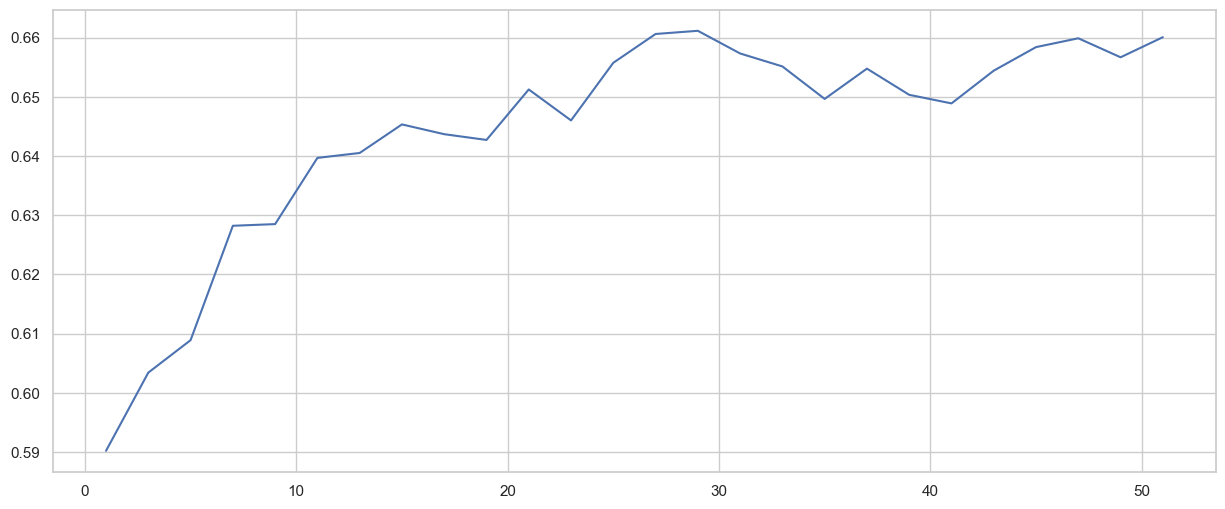

In [127]:
plt.figure(figsize=(15,6))
plt.plot(scores["param_n_neighbors"], scores["mean_test_score"])
plt.show()

In [130]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [133]:
distances, indices = knn.kneighbors([X_test[257]])
print(distances[0])
print(indices[0])
for indice in indices[0]:
    print(y_train[indice])



[0.28093893 0.42145418 0.43663894 0.44706264 0.48990822 0.49237763
 0.52556831 0.55101848 0.58078542 0.60016015 0.60525247 0.6299899
 0.66391853 0.72148388 0.72501652 0.73060131 0.73637277]
[1360  314 1524 1384 1087  478  717   66  788 1431   50  856  360   54
  317  586  810]
0
0
1
1
1
1
1
1
1
0
0
1
0
0
0
1
0


In [135]:
y_test[257]

np.int64(0)